In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
print('Added to PYTHONPATH')

Added to PYTHONPATH


In [2]:
from __future__ import division
import argparse
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import scipy.stats as stats

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, KFold

import composition as comp

sns.set_palette('muted')
sns.set_color_codes()
%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['lap_reco_success', 'lap_zenith', 'num_hits_1_30', 'IT_signal',
                     'StationDensity', 'max_qfrac_1_30', 'lap_containment', 'energy_range_lap']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list, feature_labels = comp.get_training_features()
print('training features = {}'.format(feature_list))
X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(
    df, feature_list, train_he=True, test_he=True)

print('number training events = ' + str(y_train.shape[0]))
print('number testing events = ' + str(y_test.shape[0]))

/home/jbourbeau/cr-composition/composition/load_sim.py:109: RuntimeWarning: divide by zero encountered in log10
  df['log_NChannels_1_30'] = np.nan_to_num(np.log10(df['NChannels_1_30']))


training features = ['lap_log_energy', 'InIce_log_charge_1_30', 'lap_cos_zenith', 'NChannels_1_30', 'log_s125', 'StationDensity']
number training events = 145932
number testing events = 62543


In [4]:
comp_list = np.unique(df['MC_comp'])
max_depth_list = np.arange(1, 16)
pval_comp = defaultdict(list)
ks_stat = defaultdict(list)
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    pval_maxdepth = defaultdict(list)
    for max_depth in max_depth_list:
        print('max_depth = {}'.format(max_depth))
        pipeline = comp.get_pipeline('RF')
        pipeline.named_steps['classifier'].set_params(max_depth=max_depth)
        pipeline.fit(X_train_fold, y_train_fold)
        test_probs = pipeline.predict_proba(X_test_fold)
        train_probs = pipeline.predict_proba(X_train_fold)
        for class_ in pipeline.classes_:
            pval_maxdepth[le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
    for composition in comp_list:
        pval_comp[composition].append(pval_maxdepth[composition])
print(pval_comp)
pval_sys_err = {key: np.std(pval_comp[key], axis=0) for key in pval_comp}
fig, ax = plt.subplots()
for composition in pval:
    ax.errorbar(max_depth_list, pval[composition], yerr=pval_sys_err, linestyle='-.', label=composition)
plt.ylabel('KS-test p-value')
plt.xlabel('Maximum depth')
plt.legend()
plt.grid()
plt.show()

max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10
max_depth = 11
max_depth = 12
max_depth = 13
max_depth = 14
max_depth = 15
max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10
max_depth = 11
max_depth = 12
max_depth = 13
max_depth = 14
max_depth = 15
max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10
max_depth = 11
max_depth = 12
max_depth = 13
max_depth = 14
max_depth = 15
max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth = 10
max_depth = 11
max_depth = 12
max_depth = 13
max_depth = 14
max_depth = 15
max_depth = 1
max_depth = 2
max_depth = 3
max_depth = 4
max_depth = 5
max_depth = 6
max_depth = 7
max_depth = 8
max_depth = 9
max_depth 

min_samples_leaf = 1
min_samples_leaf = 26
min_samples_leaf = 51
min_samples_leaf = 76
min_samples_leaf = 101
min_samples_leaf = 126
min_samples_leaf = 151
min_samples_leaf = 176
min_samples_leaf = 201
min_samples_leaf = 226
min_samples_leaf = 251
min_samples_leaf = 276
min_samples_leaf = 301
min_samples_leaf = 326
min_samples_leaf = 351
min_samples_leaf = 376


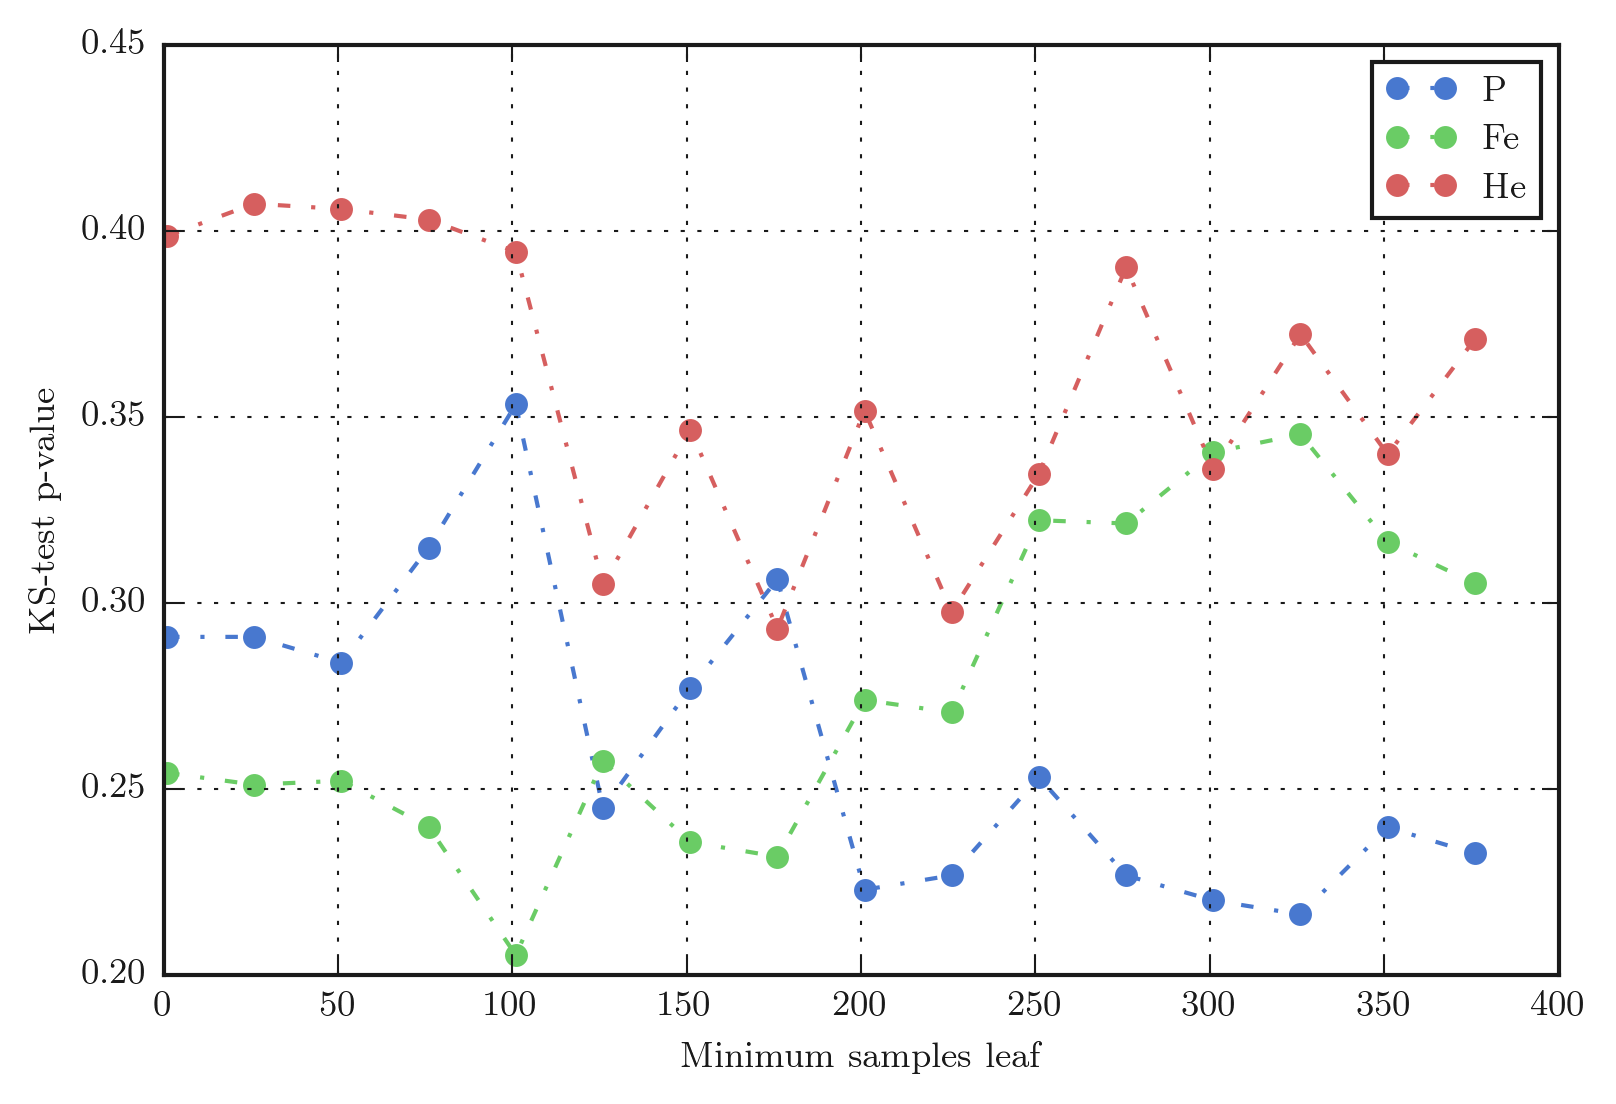

In [34]:
comp_list = np.unique(df['MC_comp'])
min_samples_list = np.arange(1, 400, 25)
pval = defaultdict(list)
ks_stat = defaultdict(list)
for min_samples_leaf in min_samples_list:
    print('min_samples_leaf = {}'.format(min_samples_leaf))
    pipeline = comp.get_pipeline('RF')
    params = {'max_depth': 4, 'min_samples_leaf': min_samples_leaf}
    pipeline.named_steps['classifier'].set_params(**params)
    pipeline.fit(X_train, y_train)
    test_probs = pipeline.predict_proba(X_test)
    train_probs = pipeline.predict_proba(X_train)
    for class_ in pipeline.classes_:
        pval[le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
fig, ax = plt.subplots()
for composition in pval:
    ax.plot(min_samples_list, pval[composition], linestyle='-.', label=composition)
plt.ylabel('KS-test p-value')
plt.xlabel('Minimum samples leaf')
plt.legend()
plt.grid()
plt.show()

In [1]:
comp_list = np.unique(df['MC_comp'])
min_samples_list = [1, 25, 50, 75]
# min_samples_list = [1, 100, 200, 300]
fig, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
for min_samples_leaf, ax in zip(min_samples_list, axarr.flatten()):
    print('min_samples_leaf = {}'.format(min_samples_leaf))
    max_depth_list = np.arange(1, 16)
    pval = defaultdict(list)
    ks_stat = defaultdict(list)
    for max_depth in max_depth_list:
        pipeline = comp.get_pipeline('RF')
        params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
        pipeline.named_steps['classifier'].set_params(**params)
        pipeline.fit(X_train, y_train)
        test_probs = pipeline.predict_proba(X_test)
        train_probs = pipeline.predict_proba(X_train)
        for class_ in pipeline.classes_:
            pval[le.inverse_transform(class_)].append(stats.ks_2samp(test_probs[:, class_], train_probs[:, class_])[1])
    for composition in pval:
        ax.plot(max_depth_list, pval[composition], linestyle='-.', label=composition)
    ax.set_ylabel('KS-test p-value')
    ax.set_xlabel('Maximum depth')
    ax.set_title('min samples = {}'.format(min_samples_leaf))
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined